In [4]:
from newton import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

## Newton's Method

The method ```newton(f, x0)``` can be used to find the zeros of any 1D function f(x) with a 1D input x. This includes functions with different dimensional inputs and outputs.

### Example 1

Let's start with a simple example of $f(x) = x - sin(x)$

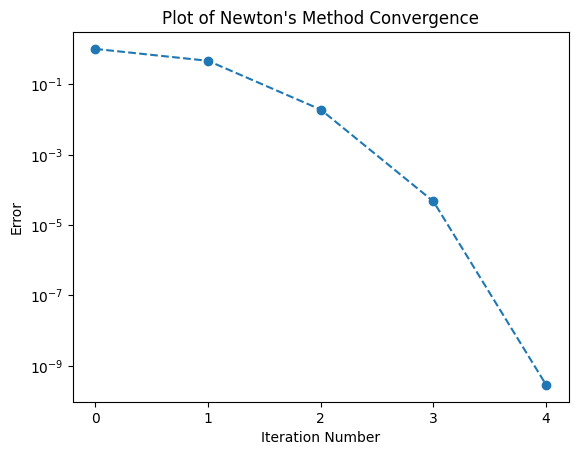

In [5]:
def f(x):
    return x - np.cos(x)

x, y = newton(f, 0)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(y), '--o')
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Newton\'s Method Convergence')
plt.show()

### Example 2

This function can also find the zero of a multi-variable function going from one dimension to another. A very clear example is the norm function $||\vec{x}||$.

In [6]:
x, y = newton(np.linalg.norm, np.array([200, 300, 400]))

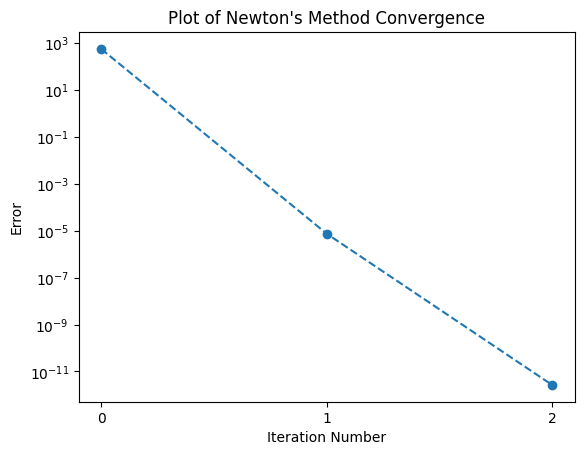

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(y), '--o')
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Newton\'s Method Convergence')
plt.show()

### Example 3

The next example involves two spring-like rods sustaining a load at an angle. This will account for large deflections producing the following equations:

```math
\Sigma F_x = 0 = -\frac{l+u}{\sqrt{v^2 + (l+u)^2}} K_{AB} \left(\sqrt{v^2 + (l+u)^2}\right) + \frac{l-u}{\sqrt{v^2 + (l-u)^2}} K_{BC} \left(\sqrt{v^2 + (l-u)^2} - l\right) \\
\Sigma F_y = 0 = \frac{v}{\sqrt{v^2 + (l+u)^2}} K_{AB} \left(\sqrt{v^2 + (l+u)^2}\right) + \frac{v}{\sqrt{v^2 + (l-u)^2}} K_{BC} \left(\sqrt{v^2 + (l-u)^2} - l\right) - P
```
This example will break it down into smaller functions before building it back up to the full expression

In [8]:
Kab = 100
Kbc = 200
l = 10
P = 0.1

def Lab(u, v):
    return np.sqrt((l+u)**2 + v**2)

def Lbc(u, v):
    return np.sqrt((l-u)**2 + v**2)

def F(x):
    u, v = x
    lab = Lab(u, v)
    lbc = Lbc(u, v)
    return np.array([
        -(l+u)/lab * Kab * (lab - l) + (l-u)/lbc * Kbc * (lbc-l),
        v/lab * Kab * (lab - l) + v/lbc * Kbc * (lbc-l) - P
    ])

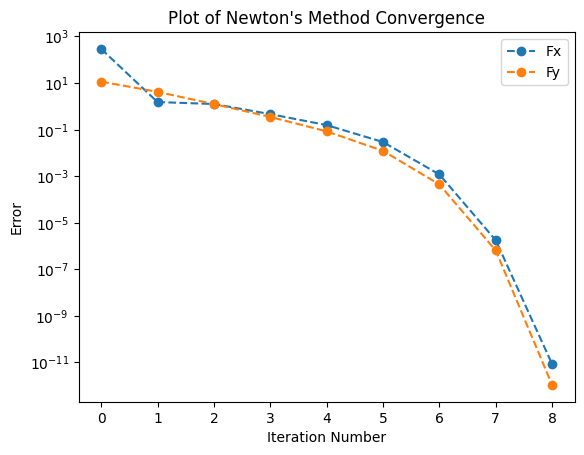

In [9]:
x, y = newton(F, np.array([1,1]))

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(y), '--o', label=['Fx', 'Fy'])
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Newton\'s Method Convergence')
ax.legend(loc='best')
plt.show()

### Example 4

This next example is numerically deriving a Lagrange point between two attractive bodies defined as $e$ and $m$. 

```math
\vec{r}_e = -d_e \hat{i} \quad \vec{r}_m = d_m \hat{i} \\

\vec{F}_e / Gm = -\frac{M_e (\vec{r} - \vec{r}_e)}{|\vec{r} - \vec{r}_e|^3} \quad \vec{F}_m / Gm = -\frac{M_m (\vec{r} - \vec{r}_m)}{|\vec{r} - \vec{r}_m|^3} \quad \vec{F}_c/m = \omega^2 \vec{r} \\
\vec{F}_e + \vec{F}_m + \vec{F}_c = \vec{0}
```

There are five stable positions and we will numerically find them. For this problem, we don't need to specify G or m since they cancel out with the zero. We will also be calculating much smaller values of distances and masses due to scale discrepency.

In [124]:
# Mass of planets 
Me = 4
Mm = 1
M = Me + Mm
R = 2
Rm = R * Me/M
Re = R * Mm/M
re = np.array([-Re, 0])
rm = np.array([Rm, 0])
rc = (re + rm)/2
w = np.sqrt(Mm/R**3)

def Fe(r):
    dr = r - re
    drm = la.norm(dr)
    return -Me*dr/drm**3

def Fm(r):
    dr = r - rm
    drm = la.norm(dr)
    return -Mm*dr/drm**3

def Fc(r):
    return r*w**2

def Ft(r):
    return Fe(r) + Fm(r) + Fc(r)

x1, y1 = newton(Ft, np.array([0, 0]))
x2, y2 = newton(Ft, np.array([R, 0]))
x3, y3 = newton(Ft, np.array([-R, 0]), eps=2.22e-3)
x4, y4 = newton(Ft, rc + np.array([0, R]), eps=2.22e-3)
x5, y5 = newton(Ft, rc + np.array([0, -R]), eps=2.22e-3)

/var/folders/10/rf3x9v5n2jz8nnc2shqpkcrc0000gn/T/ipykernel_1339/3568992979.py:18: RuntimeWarning: overflow encountered in exp
  M = 2*(1 - np.exp(Fx**2 + Fy**2))/np.sqrt(Fx**2 + Fy**2)


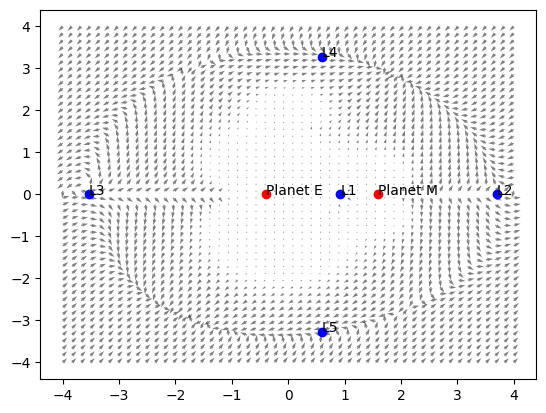

In [129]:
x = np.linspace(-2*R, 2*R, 50)
y = np.linspace(-2*R, 2*R, 50)

X, Y = np.meshgrid(x, y)

Fx = np.array([
    [
        Ft(np.array([x0, y0]))[0] for y0 in y
    ] for x0 in x
])

Fy = np.array([
    [
        Ft(np.array([x0, y0]))[1] for x0 in x
    ] for y0 in y
])

M = 2*(1 - np.exp(Fx**2 + Fy**2))/np.sqrt(Fx**2 + Fy**2)

plt.quiver(X, Y, Fx/M, Fy/M, alpha=0.5)
plt.plot(*x1[-1], 'bo')
plt.annotate('L1', x1[-1])
plt.plot(*x2[-1], 'bo')
plt.annotate('L2', x2[-1])
plt.plot(*x3[-1], 'bo')
plt.annotate('L3', x3[-1])
plt.plot(*x4[-1], 'bo')
plt.annotate('L4', x4[-1])
plt.plot(*x5[-1], 'bo')
plt.annotate('L5', x5[-1])
plt.plot(*re, 'ro')
plt.annotate('Planet E', re)
plt.plot(*rm, 'ro')
plt.annotate('Planet M', rm)
plt.show()


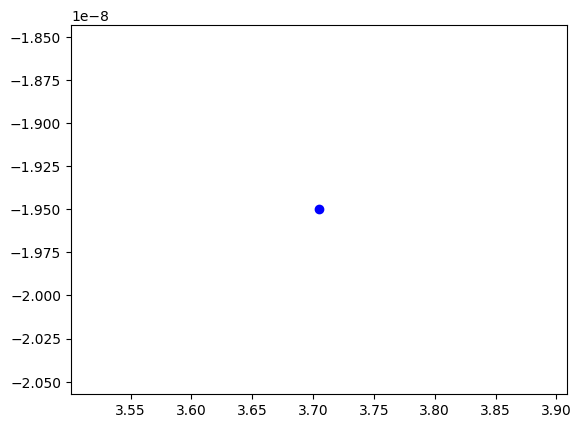

In [121]:
plt.plot(*x5[-1], 'bo')